In [0]:
#CHECKING THE DIRECTORIES WHETHER THE UPLOADED FILE IS PRESENT OR NOT

In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/Coursework_DF.html', name='Coursework_DF.html', size=2111058, modificationTime=1712544882000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020/', name='clinicaltrial_2020/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.zip', name='clinicaltrial_2020.zip', size=10599182, modificationTime=1713060295000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021/', name='clinicaltrial_2021/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1714347059000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.zip', name='clinicaltrial_2021.zip', size=11508457, modificationTime=1713060316000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023/', name='clinicaltrial_2023/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023-1.csv', name='cli

In [0]:
#FUNCTION TO DELETE A DIRECTORY AND ITS CONTENTS

In [0]:
# No need to mount DBFS root (it's already mounted at `/FileStore`)
# Function to recursively delete a directory and its contents
def delete_dir(path):
  try:
    for file in dbutils.fs.ls(path):
      if file.isDir():
        delete_dir(file.path)  # Recursive call for subdirectories
      else:
        dbutils.fs.rm(path, recurse=True)  # Use fs.rm for files in FileStore
    dbutils.fs.rm(path, recurse=True)  # Delete the empty directory itself
  except Exception as e:
    print(f"Error deleting directory {path}: {e}")
    
# Specify directories or files to be deleted (replace with your specific paths)
paths_to_delete = [
  "/FileStore/tables/clinicaltrial_2023-2.csv"
]

# Delete each path
for path in paths_to_delete:
  delete_dir(path)

# Unmount DBFS (optional, good practice for security)
# Since we didn't mount anything, this line is not necessary

print("Cleanup completed!")


Cleanup completed!


In [0]:
#COPY THE FILES FROM dbfs TO LOCAL FILE SYSTEM

In [0]:
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2023.zip", "file:/tmp/")

Out[2]: True

In [0]:

dbutils.fs.cp("/FileStore/tables/clinicaltrial_2020.zip", "file:/tmp/")

True

In [0]:

dbutils.fs.cp("/FileStore/tables/clinicaltrial_2021.zip", "file:/tmp/")

Out[3]: True

In [0]:
dbutils.fs.cp("/FileStore/tables/pharma.zip", "file:/tmp/")

Out[5]: True

In [0]:
#CHECKING THAT  WHETHER IT IS IN LOCAL FILE SYSTEM

In [0]:
%sh
ls /tmp/

Rserv
RtmpxJ1AIn
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021.zip
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-6271a62ed2b044e18cf155510f6bfbdd-apache2.service-Yz0XGi
systemd-private-6271a62ed2b044e18cf155510f6bfbdd-ntp.service-5eIkfj
systemd-private-6271a62ed2b044e18cf155510f6bfbdd-systemd-logind.service-SqU12g
systemd-private-6271a62ed2b044e18cf155510f6bfbdd-systemd-resolved.service-3fdDWi
tmp.hQysSw0PF6


In [0]:
# UNZIPPING THE FILES IN LOCAL FILES SYSTEM

In [0]:
%sh
unzip -d /tmp/ /tmp/clinicaltrial_2023.zip

unzip:  cannot find or open /tmp/clinicaltrial_2023.zip, /tmp/clinicaltrial_2023.zip.zip or /tmp/clinicaltrial_2023.zip.ZIP.


In [0]:

%sh
unzip -d /tmp/ /tmp/clinicaltrial_2020.zip

Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  


In [0]:

%sh
unzip -d /tmp/ /tmp/clinicaltrial_2021.zip

Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  


In [0]:
%sh
unzip -d /tmp/ /tmp/pharma.zip

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
#NOW CHECKING ITS CONTENT IN LOCAL FILE SYSTEM

In [0]:
ls /tmp 

Rserv/
RtmpPxEaKG/
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2020.zip
clinicaltrial_2021.csv
clinicaltrial_2021.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root/
python_lsp_logs/
systemd-private-9fd4baf3472e4467a84fa947c886e43f-systemd-logind.service-UUoyM6/
systemd-private-9fd4baf3472e4467a84fa947c886e43f-systemd-resolved.service-BQ1B1h/
tmp.PZ7q1SvE5J


In [0]:
%sh
ls /tmp/clinicaltrial_2023.zip

/tmp/clinicaltrial_2023.zip


In [0]:

%sh
ls /tmp/clinicaltrial_2020.zip

/tmp/clinicaltrial_2020.zip


In [0]:

%sh
ls /tmp/clinicaltrial_2021.zip

/tmp/clinicaltrial_2021.zip


In [0]:
%sh
ls /tmp/pharma.zip

/tmp/pharma.zip


In [0]:
#MAKING DIRECTORIES IN DBFS 

In [0]:
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2023")

Out[36]: True

In [0]:
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2021")

True

In [0]:
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2020")

True

In [0]:
dbutils.fs.mkdirs("FileStore/tables/pharma")

Out[37]: True

In [0]:
#NOW MOVE THE UNZIPPED FILES FROM LOCAL FILE SYSTEM TO RECENTLY CREATED DIRECTORIES

In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2023.csv", "/FileStore/tables/clinicaltrial_2023", True)

Out[38]: True

In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "/FileStore/tables/clinicaltrial_2021", True)

True

In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "/FileStore/tables/clinicaltrial_2020", True)

True

In [0]:
dbutils.fs.mv("file:/tmp/pharma.csv", "/FileStore/tables/pharma", True)

Out[39]: True

In [0]:
#NOW CHECKING THE FILES CONTENTS

In [0]:
dbutils.fs.ls("FileStore/tables/clinicaltrial_2023/")

Out[40]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023/cleaned_clinicaltrial_2023.csv/', name='cleaned_clinicaltrial_2023.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1712880714000)]

In [0]:
dbutils.fs.ls("FileStore/tables/clinicaltrial_2020/")

[FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1713061379000)]

In [0]:
dbutils.fs.ls("FileStore/tables/clinicaltrial_2021/")

[FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1713061757000)]

In [0]:
dbutils.fs.ls("FileStore/tables/pharma/")

Out[41]: [FileInfo(path='dbfs:/FileStore/tables/pharma/pharma.csv', name='pharma.csv', size=678999, modificationTime=1712880717000)]

In [0]:
#NOW PRINTING THE HEAD OF FILES

In [0]:
dbutils.fs.head("/FileStore/tables/pharma/pharma.csv")

[Truncated to first 65536 bytes]
Out[43]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to in

In [0]:
dbutils.fs.head("FileStore/tables/clinicaltrial_2023/clinicaltrial_2023.csv")

[Truncated to first 65536 bytes]
Out[44]: '"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02

In [0]:
dbutils.fs.head("/FileStore/tables/clinicaltrial_2020/clinicaltrial_2020.csv")

[Truncated to first 65536 bytes]


"Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|\r\nNCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|\r\nNCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate\r\nNCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|Observationa

In [0]:
dbutils.fs.head("/FileStore/tables/clinicaltrial_2023/clinicaltrial_2023.csv")

[Truncated to first 65536 bytes]
Out[46]: '"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02

In [0]:
#INITIALIZING SPARK SESSION

In [0]:


from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType

# Initialize Spark session
spark = SparkSession.builder.appName("Data Cleaning").getOrCreate()

In [0]:
#LOADING THE FILE

In [0]:
file_path = "/FileStore/tables/clinicaltrial_2023/clinicaltrial_2023.csv"
raw_rdd = spark.sparkContext.textFile(file_path)

In [0]:
#DEFINING SCHEMA

In [0]:
schema = StructType([
    StructField("Id", StringType(), True),
    StructField("Study Title", StringType(), True),
    StructField("Acronym", StringType(), True),
    StructField("Status", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Collaborators", StringType(), True),
    StructField("Enrollment", StringType(), True),
    StructField("Funder Type", StringType(), True),
    StructField("Type", StringType(), True),
    StructField("Study Design", StringType(), True),
    StructField("Start", StringType(), True),
    StructField("Completion", StringType(), True),
])

In [0]:
#DATA CLEANING

In [0]:
from pyspark.sql import SparkSession
import pandas as pd

from pyspark.sql.types import StructType, StructField, StringType

# Initialize SparkSession if not already done
spark = SparkSession.builder.appName("Clinical Trials Data Cleaning").getOrCreate()

# Define schema
mySchema = StructType([
    StructField("Id", StringType(), True),
    StructField("Study Title", StringType(), True),
    StructField("Acronym", StringType(), True),
    StructField("Status", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Collaborators", StringType(), True),
    StructField("Enrollment", StringType(), True),
    StructField("Funder Type", StringType(), True),
    StructField("Type", StringType(), True),
    StructField("Study Design", StringType(), True),
    StructField("Start", StringType(), True),
    StructField("Completion", StringType(), True)
])

# Read data
spark_df = spark.read.option("delimiter", "#").csv("/FileStore/tables/clinicaltrial_2023/clinicaltrial_2023.csv")

# Convert to Pandas DataFrame
all_data = spark_df.toPandas()

# Process data
data = []
for line in all_data[all_data.columns[0]]:
    parts = line.strip().split("\t")
    new_parts = [part.replace(",", "") for part in parts]
    data.append(new_parts)

# Create Pandas DataFrame
df = pd.DataFrame(data)

# Set column names
df.columns = df.iloc[0]

# Remove header row
df = df.iloc[1:].reset_index(drop=True)

# Strip column names
df.columns = df.columns.str.strip()

# Apply cleaning to first and last columns
for col in [df.columns[0], df.columns[-1]]:
    if df[col].dtype == object:
        df[col] = df[col].apply(lambda x: x.strip('""') if isinstance(x, str) else x)





# Convert Pandas DataFrame to PySpark DataFrame
df = spark.createDataFrame(df, schema=mySchema)

df.show()




In [0]:
%python

def clean_and_pad(parts):
    # Remove commas, strip quotes and whitespace
    cleaned_parts = [part.replace(",", "").strip().strip('"') for part in parts]
    # Pad the row if it has fewer elements than expected
    if len(cleaned_parts) < 14:
        cleaned_parts += [""] * (14 - len(cleaned_parts))
    return cleaned_parts

processed_rdd = raw_rdd.map(lambda line: line.split("\t")).map(clean_and_pad)


# Filter out the header if it's the first row and matches expected headers
header = processed_rdd.first()  # Assuming the first row is the header
data_rdd = processed_rdd.filter(lambda row: row != header and len(row) == 14)  # Ensure all rows have exactly 14 elements

# Create DataFrame
df = spark.createDataFrame(data_rdd, schema=schema)
df.show()



+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|         Id|         Study Title|   Acronym|            Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|     Start|Completion|
+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|NCT03630471|Effectiveness of ...|     PRIDE|         COMPLETED|Mental Health Iss...|BEHAVIORAL: PRIDE...|             Sangath|Harvard Medical S...|     250.0|      OTHER|INTERVENTIONAL|Allocation: RANDO...|2018-08-20|2019-02-28|
|NCT05992571|Oral Ketone Monoe...|          |        RECRUITING|Cerebrovascular 

In [0]:
#CORRECTING DATE FORMATE USING USER DEFINED FUNCTIONS

In [0]:


from pyspark.sql.types import StructType, StructField, StringType, DateType
from pyspark.sql.functions import col, udf, lit
import re
def delete_day(date_str):
    """Removes the day part from a date string (if present) using regular expressions."""
    return re.sub(r'(\b\d(4)-\d(2))-\d(2)\b', r'\1', str(date_str))
def format_date(date_str):
    """Formats a date string (YYYY-MM) into a more human-readable format (Month Year)."""
    if date_str:
        try:
            date_obj = datetime.strptime(date_str, "%Y-%m")
            return date_obj.strftime("%b %Y")
        except ValueError:
            return date_str
    else:
        return date_str
# Define UDFs
delete_day_udf = udf(delete_day, StringType())
format_date_udf = udf(format_date, StringType())
# Apply UDFs in the correct order
df = df.withColumn("Start_Cleaned", delete_day_udf(col("Start")))
df = df.withColumn("Completion_Cleaned", delete_day_udf(col("Completion")))
df = df.withColumn("Start_Date", format_date_udf(col("Start_Cleaned")))
df.withColumn("Completion_Date", format_date_udf(col("Completion_Cleaned")))


Out[9]: DataFrame[Id: string, Study Title: string, Acronym: string, Status: string, Conditions: string, Interventions: string, Sponsor: string, Collaborators: string, Enrollment: string, Funder Type: string, Type: string, Study Design: string, Start: string, Completion: string, Start_Cleaned: string, Completion_Cleaned: string, Start_Date: string, Completion_Date: string]

In [0]:
#NOW DELETING PRIVIOUSE(ORIGINAL) DATE FORMATES

In [0]:
df = df.drop("Start")
df = df.drop("Completion")

In [0]:
df.show()

+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+-------------+------------------+
|         Id|         Study Title|   Acronym|            Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|Start_Cleaned|Completion_Cleaned|
+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+-------------+------------------+
|NCT03630471|Effectiveness of ...|     PRIDE|         COMPLETED|Mental Health Iss...|BEHAVIORAL: PRIDE...|             Sangath|Harvard Medical S...|     250.0|      OTHER|INTERVENTIONAL|Allocation: RANDO...|   2018-08-20|        2019-02-28|
|NCT05992571|Oral Ketone Monoe...|  

In [0]:
#Q1: The number of studies in the dataset. You must ensure that you explicitly check distinct studies.

In [0]:
df.distinct().count()

Out[16]: 483422

In [0]:
#Q2: You should list all the types (as contained in the Type column) of studies in the dataset along with the frequencies of each type. These should be ordered from most frequent to least frequent.

In [0]:
df.groupBy('Type').count().orderBy('count', ascending=False).show(4)


+---------------+------+
|           Type| count|
+---------------+------+
| INTERVENTIONAL|371382|
|  OBSERVATIONAL|110221|
|EXPANDED_ACCESS|   928|
|               |   891|
+---------------+------+



In [0]:
#Q3:  The top 5 conditions (from Conditions) with their frequencies.

In [0]:
from pyspark.sql.functions import explode, split, col, trim

# Define the delimiter for the conditions column
conditions_delimiter = {
    "clinicaltrial_2023": "\\|",
}

# Replace special characters in the delimiter string
delimiter = conditions_delimiter.get("clinicaltrial_2023", "\\|")

# Explode the Conditions column by the delimiter "|", handle empty conditions, and clean whitespace
exploded_df = df.withColumn('Conditions', explode(split(trim(col('Conditions')), delimiter))) \
                .filter(col('Conditions') != '')

# Group by Conditions and count occurrences
condition_counts_df = exploded_df.groupBy('Conditions').count()

# Order by count in descending order and show the top 5
condition_counts_df.orderBy(condition_counts_df['count'].desc()).show(5, truncate=False)


+-------------+-----+
|Conditions   |count|
+-------------+-----+
|Healthy      |9731 |
|Breast Cancer|7502 |
|Obesity      |6549 |
|Stroke       |4073 |
|Hypertension |4022 |
+-------------+-----+
only showing top 5 rows



In [0]:
#Q4: Find the 10 most common sponsors that are not pharmaceutical companies, along with the number of clinical trials they have sponsored. Hint: For a basic implementation, you can assume that the Parent Company column contains all possible pharmaceutical companies.

In [0]:
# Assuming your data is stored in a CSV file named "pharmaceutical_data.csv"
file_path = "/FileStore/tables/pharma/pharma.csv"  # Update the file path accordingly

# Read the CSV file into a DataFrame
pharma= spark.read.option("header", "true").csv(file_path)

# Select only the "Parent_Company" column
parent_companies = pharma.select("Parent_Company")

# Show the first few rows of the DataFrame

parent_companies.createOrReplaceTempView("parent_companies_temp")

In [0]:
pharma_list =pharma.select("Parent_Company").rdd.flatMap(lambda x: x).collect()
dfs = df.select("Sponsor")

non_pharma_sponsors = dfs.groupBy("Sponsor").count().orderBy("count", ascending=False).filter(~dfs.Sponsor.isin(pharma_list)).show(10)

+--------------------+-----+
|             Sponsor|count|
+--------------------+-----+
|National Cancer I...| 3410|
|   Assiut University| 3335|
|    Cairo University| 3023|
|Assistance Publiq...| 2951|
|         Mayo Clinic| 2766|
|M.D. Anderson Can...| 2702|
|Novartis Pharmace...| 2393|
|National Institut...| 2340|
|Massachusetts Gen...| 2263|
|National Taiwan U...| 2181|
+--------------------+-----+
only showing top 10 rows



In [0]:
#Q5: Plot number of completed studies for each month in 2023. You need to include your visualization as well as a table of all the values you have plotted for each month.

+-----+-----+
|Month|count|
+-----+-----+
|   01| 1494|
|   02| 1272|
|   03| 1552|
|   04| 1324|
|   05| 1415|
|   06| 1619|
|   07| 1360|
|   08| 1230|
|   09| 1152|
|   10| 1058|
|   11|  909|
|   12| 1082|
+-----+-----+



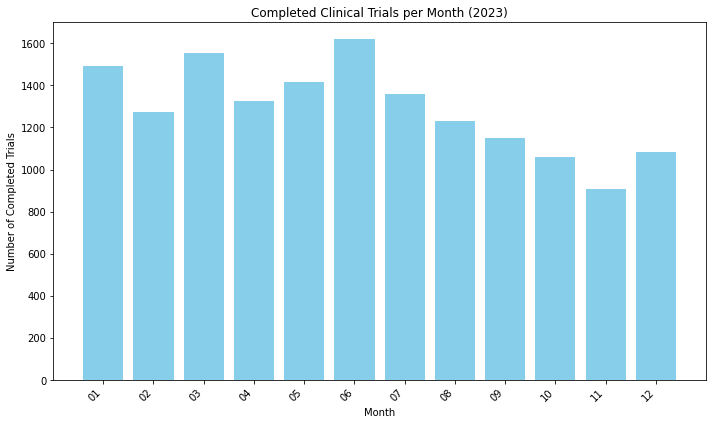

In [0]:
from pyspark.sql.functions import split, regexp_replace
import matplotlib.pyplot as plt
# Ensure columns are properly formatted
for col in df.columns:
    df = df.withColumnRenamed(col, col.strip(",").strip('"'))

# Extract data for completed clinical trials in 2023
completed_cd = df.withColumn('Year', split('Completion_Cleaned', "-")[0]) \
                 .withColumn('Month', split('Completion_Cleaned', "-")[1]) \
                 .withColumn('Month', regexp_replace("Month", ",", "")) \
                 .withColumn('Month', regexp_replace("Month", '"', "")) \
                 .filter(df.Status.isin(["COMPLETED"])) \
                 .filter(df.Completion_Cleaned.startswith("2023")) \
                 .select("Month", "Year", "Status")


completed_cd.filter(completed_cd.Year.isin(["2023"])).groupBy("Month").count().orderBy("Month", ascending=True).show()

# Get monthly counts for completed trials in 2023
monthly_counts = (
    completed_cd.filter(completed_cd.Year.isin(["2023"]))
    .groupBy("Month")
    .count()
    .orderBy("Month", ascending=True)
    .collect()
)
months = [row["Month"] for row in monthly_counts]
counts = [row["count"] for row in monthly_counts]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(months, counts, color='skyblue')
plt.xlabel("Month")
plt.ylabel("Number of Completed Trials")
plt.title("Completed Clinical Trials per Month (2023)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


In [0]:
#Additional analysis:- Find the number of trials initiated by each collaborator.(using df)

In [0]:
from pyspark.sql.functions import desc

collaborator_count = df.groupBy("Collaborators").count().orderBy(desc("count")).limit(10)
collaborator_count.show()


+--------------------+------+
|       Collaborators| count|
+--------------------+------+
|                    |325505|
|National Cancer I...|  7918|
|National Heart" L...|  1689|
|National Institut...|  1590|
|National Institut...|  1394|
|Merck Sharp & Doh...|  1334|
|National Institut...|  1119|
|              Pfizer|   940|
|National Institut...|   872|
|     GlaxoSmithKline|   805|
+--------------------+------+



In [0]:
#Additional analysis of writing general code for clinical trial 2020 and clinical trial 2021

In [0]:
# for clinicaltrial_2020

In [0]:

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType
import zipfile

# Initialize Spark session
spark = SparkSession.builder.appName("Data Cleaning").getOrCreate()

# Define the schema
schema = StructType([
    StructField("Id", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Status", StringType(), True),
    StructField("Start", StringType(), True),
    StructField("Completion", StringType(), True),
    StructField("Type", StringType(), True),
    StructField("Submission", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True),
])

# Load data
# Load data
file_path = "/FileStore/tables/clinicaltrial_2020"
raw_rdd = spark.sparkContext.textFile(file_path)

# Process and clean data
def clean_and_pad(line):
    # Split line by pipe character
    parts = line.split("|")
    # Pad the row if it has fewer elements than expected
    if len(parts) < 9:
        parts += [""] * (9 - len(parts))
    return parts

processed_rdd = raw_rdd.map(clean_and_pad)

# Filter out the header if it's the first row and matches expected headers
header = processed_rdd.first()  # Assuming the first row is the header
data_rdd = processed_rdd.filter(lambda row: row != header and len(row) == 9)  # Ensure all rows have exactly 9 elements

# Create DataFrame
df = spark.createDataFrame(data_rdd, schema=schema)

# Show the cleaned DataFrame
df.show()




+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|NCT02758028|The University of...|          Recruiting|Aug 2005|  Nov 2021|      Interventional|  Apr 2016|                    |                    |
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|Autistic Disorder...|                    |
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016|   Diabetes Mellitus|                    |
|NCT02759848|Istanbul Medeniye...|           Completed|Jan 2012|  Dec 2014|       Observational|  Ma

In [0]:
# for clinicaltrial_2021

In [0]:

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType
import zipfile

# Initialize Spark session
spark = SparkSession.builder.appName("Data Cleaning").getOrCreate()

# Define the schema
schema = StructType([
    StructField("Id", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Status", StringType(), True),
    StructField("Start", StringType(), True),
    StructField("Completion", StringType(), True),
    StructField("Type", StringType(), True),
    StructField("Submission", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True),
])

# Load data
# Load data
file_path = "/FileStore/tables/clinicaltrial_2021"
raw_rdd = spark.sparkContext.textFile(file_path)

# Process and clean data
def clean_and_pad(line):
    # Split line by pipe character
    parts = line.split("|")
    # Pad the row if it has fewer elements than expected
    if len(parts) < 9:
        parts += [""] * (9 - len(parts))
    return parts

processed_rdd = raw_rdd.map(clean_and_pad)

# Filter out the header if it's the first row and matches expected headers
header = processed_rdd.first()  # Assuming the first row is the header
data_rdd = processed_rdd.filter(lambda row: row != header and len(row) == 9)  # Ensure all rows have exactly 9 elements

# Create DataFrame
df = spark.createDataFrame(data_rdd, schema=schema)

# Show the cleaned DataFrame
df.show()




+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|NCT02758028|The University of...|          Recruiting|Aug 2005|  Nov 2021|      Interventional|  Apr 2016|                    |                    |
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|Autistic Disorder...|                    |
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016|   Diabetes Mellitus|                    |
|NCT02759848|Istanbul Medeniye...|           Completed|Jan 2012|  Dec 2014|       Observational|  Ma

In [0]:
#Additional Analysis for visilization of data

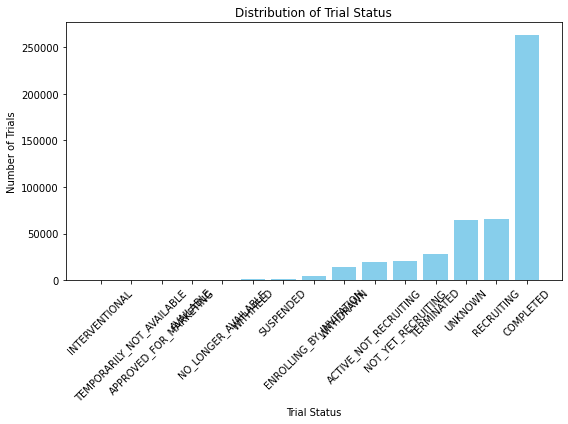

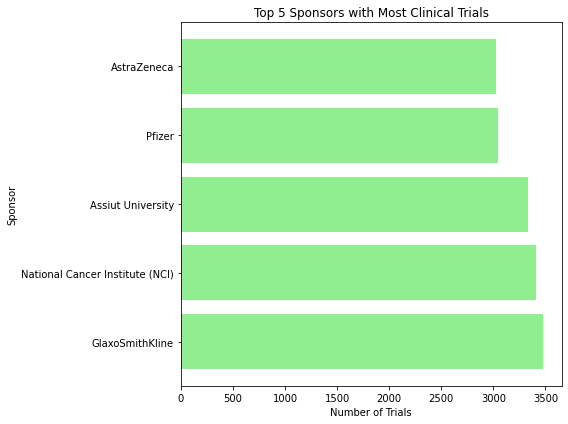

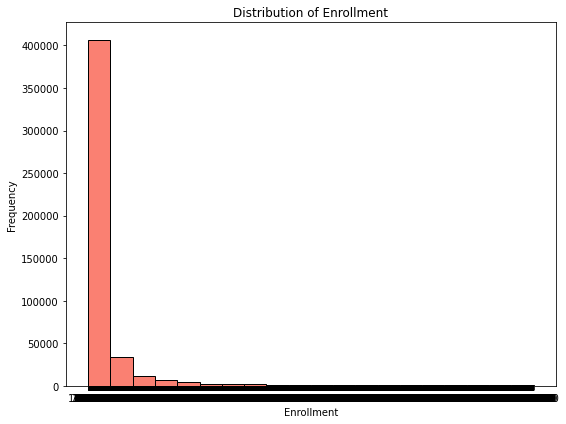

<command-1257364143212388>:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


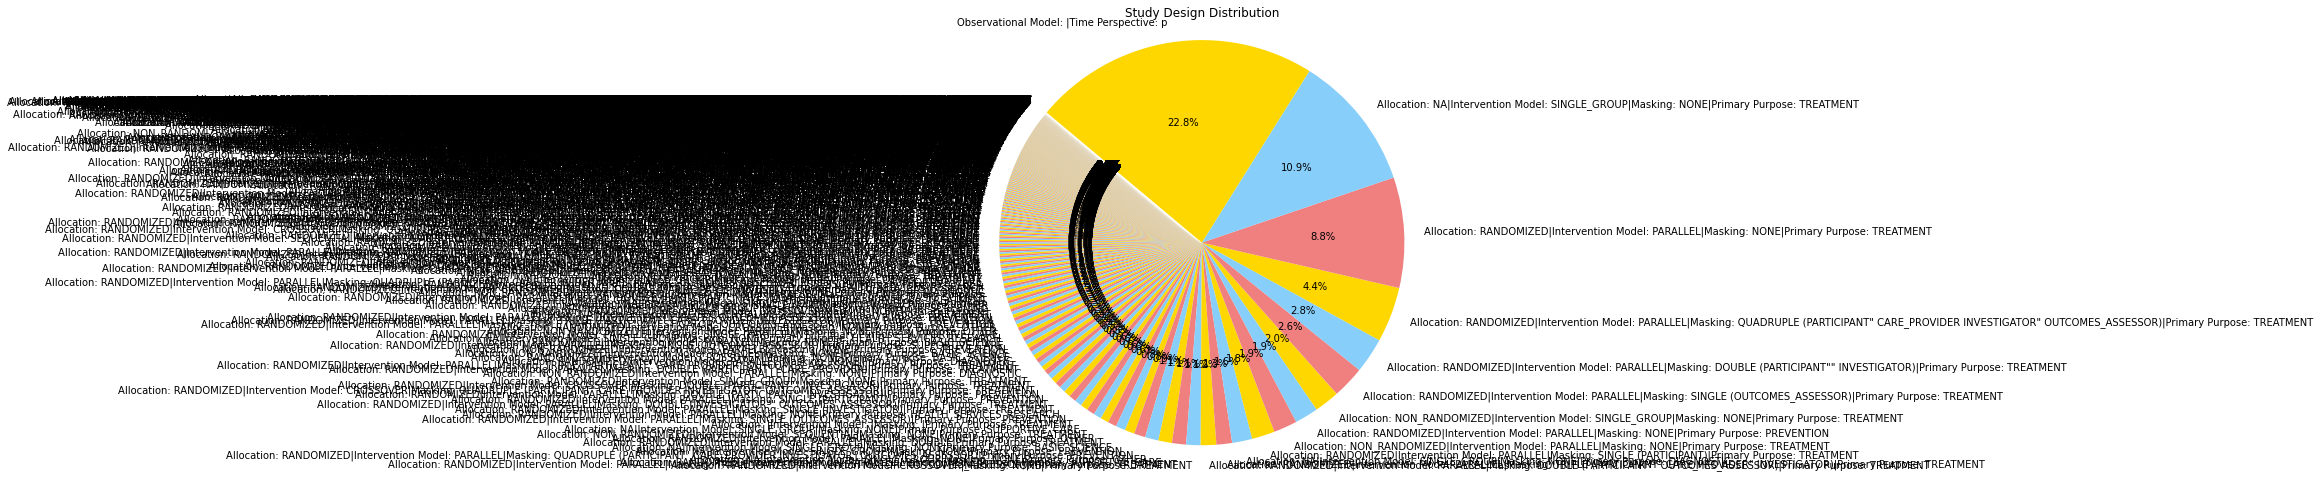

In [0]:
import matplotlib.pyplot as plt

# Additional analysis: Distribution of Trial Status
status_counts_df = df.groupBy("Status").count().orderBy("count")

# Convert DataFrame to Pandas for visualization
status_counts_pandas = status_counts_df.toPandas()

# Bar Chart: Distribution of Trial Status
plt.figure(figsize=(8, 6))
plt.bar(status_counts_pandas["Status"], status_counts_pandas["count"], color='skyblue')
plt.xlabel('Trial Status')
plt.ylabel('Number of Trials')
plt.title('Distribution of Trial Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional analysis: Top Sponsors
top_sponsors_df = df.groupBy("Sponsor").count().orderBy("count", ascending=False).limit(5)

# Convert DataFrame to Pandas for visualization
top_sponsors_pandas = top_sponsors_df.toPandas()

# Bar Chart: Top Sponsors
plt.figure(figsize=(8, 6))
plt.barh(top_sponsors_pandas["Sponsor"], top_sponsors_pandas["count"], color='lightgreen')
plt.xlabel('Number of Trials')
plt.ylabel('Sponsor')
plt.title('Top 5 Sponsors with Most Clinical Trials')
plt.tight_layout()
plt.show()

# Additional analysis: Enrollment Distribution
enrollment_values_df = df.select("Enrollment").filter(df["Enrollment"].cast("int").isNotNull()).rdd.flatMap(lambda x: x).collect()

# Histogram: Enrollment Distribution
plt.figure(figsize=(8, 6))
plt.hist(enrollment_values_df, bins=20, color='salmon', edgecolor='black')
plt.xlabel('Enrollment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrollment')
plt.tight_layout()
plt.show()

# Additional analysis: Study Design Distribution
study_design_counts_df = df.groupBy("Study Design").count().orderBy("count")

# Convert DataFrame to Pandas for visualization
study_design_counts_pandas = study_design_counts_df.toPandas()

# Pie Chart: Study Design Distribution
plt.figure(figsize=(8, 8))
plt.pie(study_design_counts_pandas["count"], labels=study_design_counts_pandas["Study Design"], autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Study Design Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()


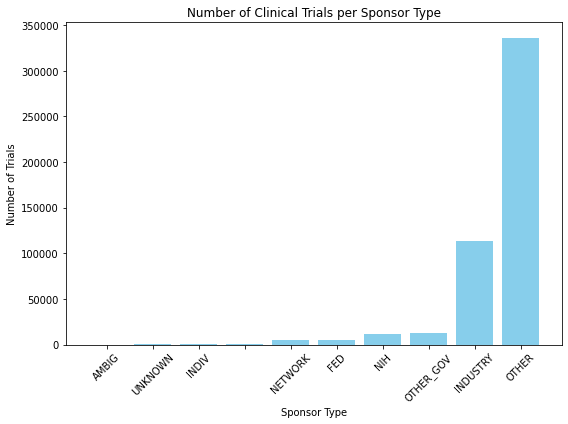

In [0]:
import matplotlib.pyplot as plt

# Additional analysis: Number of trials per Sponsor Type
sponsor_type_counts_df = df.groupBy("Funder Type").count().orderBy("count")

# Bar Chart: Number of trials per Sponsor Type
plt.figure(figsize=(8, 6))
plt.bar(sponsor_type_counts_df.select("Funder Type").rdd.flatMap(lambda x: x).collect(), 
        sponsor_type_counts_df.select("count").rdd.flatMap(lambda x: x).collect(), 
        color='skyblue')
plt.xlabel('Sponsor Type')
plt.ylabel('Number of Trials')
plt.title('Number of Clinical Trials per Sponsor Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


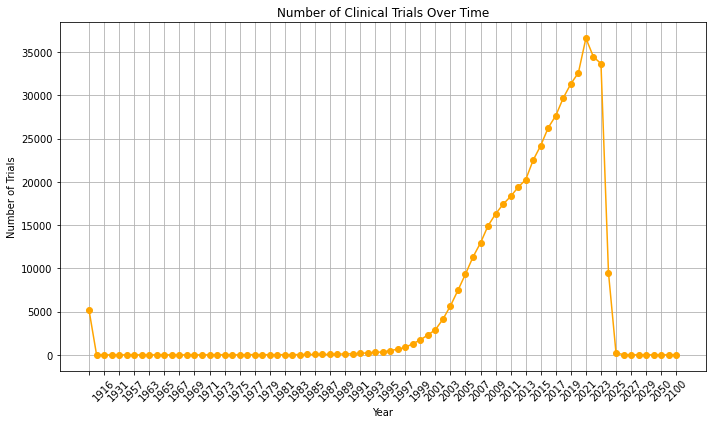

In [0]:
# Additional analysis: Find the number of trials per year of start date
trials_per_year_df = df.withColumn("Start_Cleaned Year", df["Start_Cleaned"].substr(1, 4))
trials_per_year_counts_df = trials_per_year_df.groupBy("Start_Cleaned Year").count().orderBy("Start_Cleaned Year")

# Convert DataFrame to Pandas for visualization
trials_per_year_counts_pandas = trials_per_year_counts_df.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(trials_per_year_counts_pandas["Start_Cleaned Year"], trials_per_year_counts_pandas["count"], marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Trials')
plt.title('Number of Clinical Trials Over Time')

# Set tick positions and labels for every 2 years
plt.xticks(range(0, len(trials_per_year_counts_pandas["Start_Cleaned Year"]), 2), trials_per_year_counts_pandas["Start_Cleaned Year"][::2], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()
